In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Set Theme
sns.set_theme()

# Load iris data 
df=pd.read_csv("Datasets/palmer_penguins.csv")
df = df.dropna()
df = df[df["species"] != "Adelie"]

X = df[["bill_length_mm","bill_depth_mm"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Chinstrap":
        return 0
    else:
        return 1
    
        
# Create target value array
y = df["species"].map(make_labels).to_numpy()

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 13)

# Instantiate a KNN classifier 
clf = KNeighborsClassifier(n_neighbors = 7)

In [7]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [8]:
print(f"clf.predict(X_test) = {clf.predict(X_test)} \n")
y_pred = clf.predict(X_test)

print(f"y_pred == y_test = {y_pred == y_test} \n")

print(f"sum(y_pred == y_test)/len(y_test) = {sum(y_pred == y_test)/len(y_test)}")

clf.predict(X_test) = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1
 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1] 

y_pred == y_test = [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True] 

sum(y_pred == y_test)/len(y_test) = 0.967741935483871


In [9]:
clf.score(X_test, y_test)

0.967741935483871

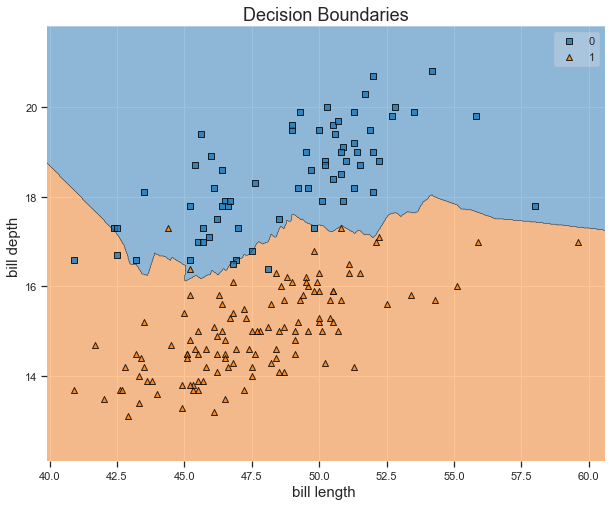

In [10]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.xlabel("bill length ", fontsize = 15)
plt.ylabel("bill depth ", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()

cf_matrix = [[19  2]
 [ 0 41]] 



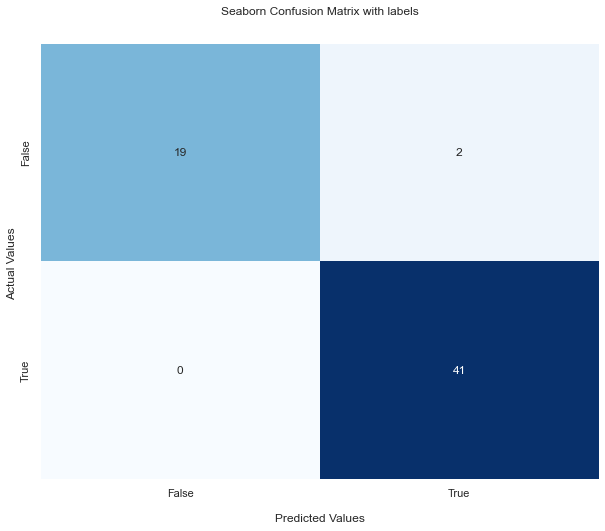

In [11]:
from sklearn.metrics import confusion_matrix

# Define the model
clf = KNeighborsClassifier(n_neighbors = 7)

# Fit the model
clf.fit(X_train,y_train)

# Make predictions on testing data
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [12]:
from sklearn.metrics import classification_report

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.95      1.00      0.98        41

    accuracy                           0.97        62
   macro avg       0.98      0.95      0.96        62
weighted avg       0.97      0.97      0.97        62



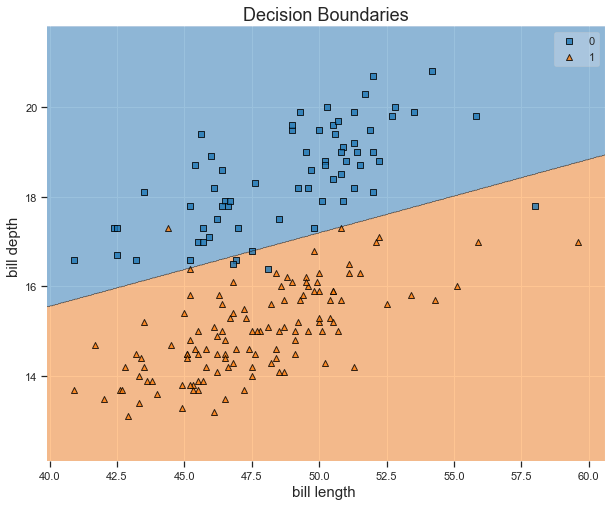

In [13]:
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression(max_iter = 10_000)
clf2.fit(X_train, y_train)

log_y_pred = clf2.predict(X_test)

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf2)
plt.xlabel("bill length ", fontsize = 15)
plt.ylabel("bill depth ", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()

cf_matrix = [[19  2]
 [ 0 41]] 



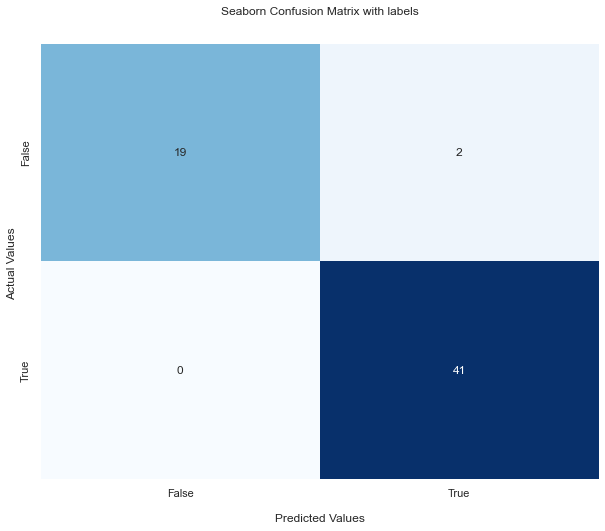

In [14]:
cf_matrix = confusion_matrix(y_test, log_y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [15]:
print(classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.95      1.00      0.98        41

    accuracy                           0.97        62
   macro avg       0.98      0.95      0.96        62
weighted avg       0.97      0.97      0.97        62



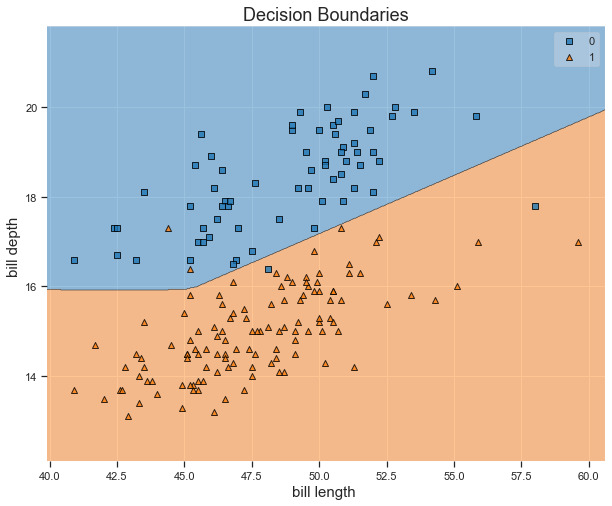

In [16]:
from sklearn.neural_network import MLPClassifier
clf3 = MLPClassifier(solver='lbfgs', alpha= 0.33,
                   hidden_layer_sizes=(120, 120), random_state=1, max_iter = 50_000)

clf3.fit(X_train, y_train)
net_y_pred = clf3.predict(X_test)

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf3)
plt.xlabel("bill length ", fontsize = 15)
plt.ylabel("bill depth ", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()

cf_matrix = [[20  1]
 [ 0 41]] 



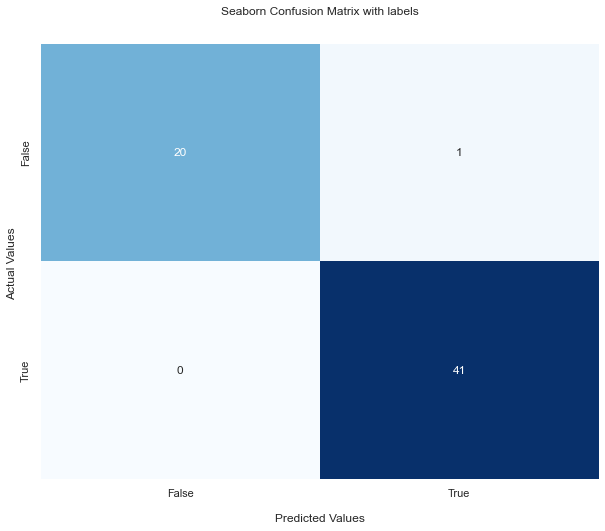

In [17]:
cf_matrix = confusion_matrix(y_test, net_y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [18]:
print(classification_report(y_test, net_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.98      1.00      0.99        41

    accuracy                           0.98        62
   macro avg       0.99      0.98      0.98        62
weighted avg       0.98      0.98      0.98        62

